# Enhancing Prediction Power of Machine Learning Using Knowledge 


In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, precision_score, recall_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [177]:
tabular_data=pd.read_csv('Got_clean_tabular_data.csv')

In [178]:
(tabular_data.isnull().sum())

name                             0
name character_deaths         1051
name character_predictions      48
allegiances                      0
nobility                         0
gender                           0
has_Allegiance                   4
is_alive                         0
has_dead_rels                    0
culture                          0
mother                           0
father                           0
spouse                           0
house                            0
heir                             0
data_poor                        0
dtype: int64

In [179]:
tabular_data.dtypes

name                           object
name character_deaths          object
name character_predictions     object
allegiances                    object
nobility                        int64
gender                          int64
has_Allegiance                float64
is_alive                        int64
has_dead_rels                   int64
culture                        object
mother                         object
father                         object
spouse                         object
house                          object
heir                           object
data_poor                       int64
dtype: object

In [180]:
tabular_data.head()

,name,name character_deaths,name character_predictions,allegiances,nobility,gender,has_Allegiance,is_alive,has_dead_rels,culture,mother,father,spouse,house,heir,data_poor
0,Erreg,NaN,Erreg,Unknown,0,1,0.0,1,0,Andals,Unknown,Unknown,Unknown,Unknown,Unknown,1
1,Hugor of the Hill,NaN,Hugor of the Hill,Unknown,0,1,0.0,1,0,Andals,Unknown,Unknown,Unknown,Unknown,Unknown,1
2,Melisandre,Melisandre,Melisandre,House Baratheon,0,0,1.0,1,0,Asshai,Unknown,Unknown,Unknown,R'hllor,Unknown,0
3,Quaithe,Quaithe,Quaithe,None,1,0,0.0,1,0,Asshai,Unknown,Unknown,Unknown,Unknown,Unknown,0
4,Cleon,NaN,Cleon,Unknown,0,1,0.0,0,0,Astapori,Unknown,Unknown,Unknown,Unknown,Unknown,1


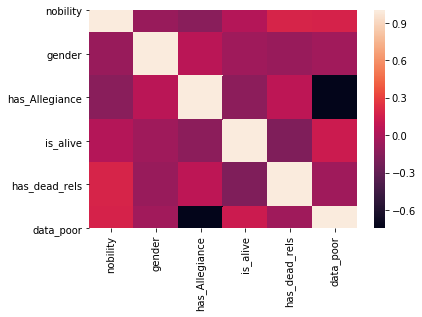

In [181]:
sns.heatmap(tabular_data.corr())

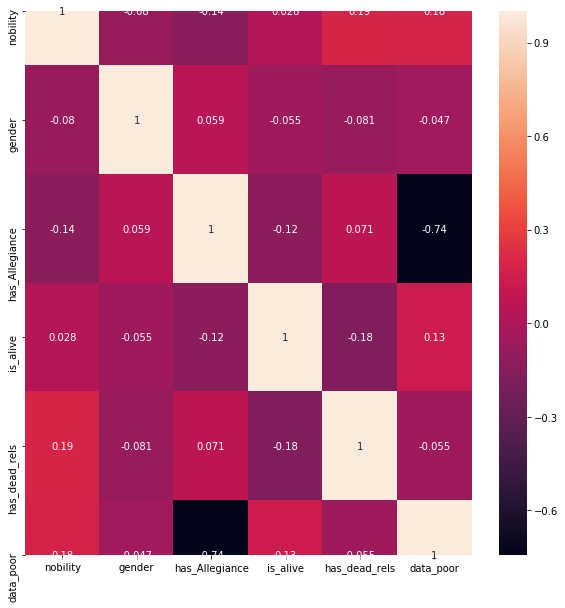

In [182]:
plt.figure(figsize=(10,10))
sns.heatmap(tabular_data.corr(), annot = True) 

In [183]:
#let's add a few binary variables to clean up our many categorical variables
tabular_data['known_culture']=1
tabular_data.loc[tabular_data['culture']=='Unknown','known_culture']=0
tabular_data['known_spouse']=1
tabular_data.loc[tabular_data['spouse']=='Unknown','spouse']=0
tabular_data['known_heir']=1
tabular_data.loc[tabular_data['heir']=='Unknown','known_heir']=0
tabular_data['known_mother']=1
tabular_data.loc[tabular_data['mother']=='Unknown','known_mother']=0
tabular_data['known_father']=1
tabular_data.loc[tabular_data['father']=='Unknown','known_father']=0

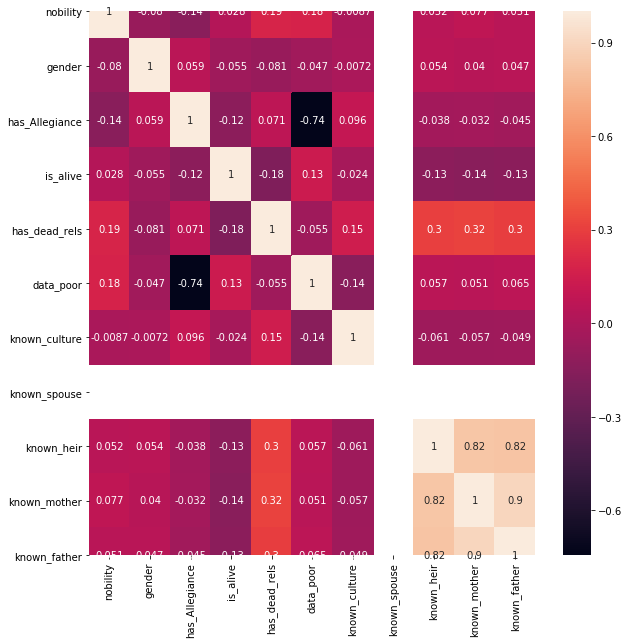

In [184]:
plt.figure(figsize=(10,10))
sns.heatmap(tabular_data.corr(), annot = True) 

I would like to explore different approaches to interpreting feature importance by the example of a Random Forest model. Most of them are also applicable to different models, starting from linear regression and ending with black-boxes such as XGBoost.
One thing to note is that the more accurate our model is, the more we can trust feature importance measures and other interpretations. I assume that the model we build is reasonably accurate (as each data scientist will strive to have such a model) and in this article, I focus on the importance measures.

In [185]:
tabular_data.head(10)

,name,name character_deaths,name character_predictions,allegiances,nobility,gender,has_Allegiance,is_alive,has_dead_rels,culture,...,father,spouse,house,heir,data_poor,known_culture,known_spouse,known_heir,known_mother,known_father
0,Erreg,NaN,Erreg,Unknown,0,1,0.0,1,0,Andals,...,Unknown,0,Unknown,Unknown,1,1,1,0,0,0
1,Hugor of the Hill,NaN,Hugor of the Hill,Unknown,0,1,0.0,1,0,Andals,...,Unknown,0,Unknown,Unknown,1,1,1,0,0,0
2,Melisandre,Melisandre,Melisandre,House Baratheon,0,0,1.0,1,0,Asshai,...,Unknown,0,R'hllor,Unknown,0,1,1,0,0,0
3,Quaithe,Quaithe,Quaithe,None,1,0,0.0,1,0,Asshai,...,Unknown,0,Unknown,Unknown,0,1,1,0,0,0
4,Cleon,NaN,Cleon,Unknown,0,1,0.0,0,0,Astapori,...,Unknown,0,Unknown,Unknown,1,1,1,0,0,0
5,Ghael,Ghael,Ghael,None,0,1,0.0,1,0,Astapori,...,Unknown,0,Unknown,Unknown,0,1,1,0,0,0
6,Grazdan,Grazdan,Grazdan,None,1,1,0.0,0,0,Astapori,...,Unknown,0,Unknown,Unknown,0,1,1,0,0,0
7,Grazdan mo Ullhor,Grazdan mo Ullhor,Grazdan mo Ullhor,None,1,1,0.0,0,0,Astapori,...,Unknown,0,Good Masters,Unknown,0,1,1,0,0,0
8,Kraznys mo Nakloz,Kraznys mo Nakloz,Kraznys mo Nakloz,None,1,1,0.0,0,0,Astapori,...,Unknown,0,Good Masters,Unknown,0,1,1,0,0,0
9,Alia,Alia of Braavos,Alia,None,0,0,0.0,1,0,Braavosi,...,Unknown,0,Unknown,Unknown,0,1,1,0,0,0


Male = 1585
Female = 378
Proportion of Female wrt Male = 23.85%
1963


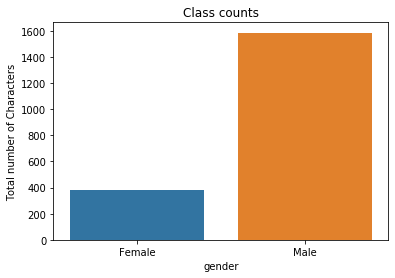

In [186]:
Male = (tabular_data[tabular_data["gender"] == 1].shape[0])
Female = tabular_data[tabular_data["gender"] == 0].shape[0]
print("Male = {}".format(Male))
print("Female = {}".format(Female))
print("Proportion of Female wrt Male = {:.2f}%".format((Female / Male) * 100))
sns.countplot(tabular_data["gender"])
plt.xticks((0, 1), ["Female", "Male"])
plt.xlabel("gender")
plt.ylabel("Total number of Characters")
plt.title("Class counts");
X = Male + Female
print(X)

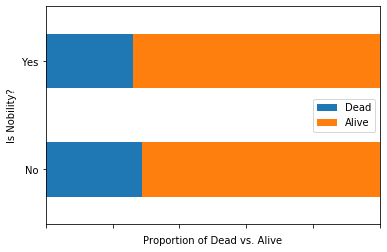

In [187]:
data=tabular_data.groupby(["nobility", "is_alive"]).count()["name"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0, width = .5)
_ = p.set_xlim([0, 1]), p.set(yticklabels = ["No", "Yes"], xticklabels = "", xlabel = "Proportion of Dead vs. Alive", ylabel = "Is Nobility?"), p.legend(["Dead", "Alive"])

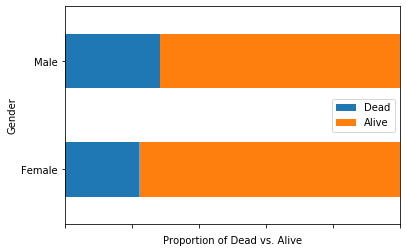

In [188]:
data=tabular_data.groupby(["gender", "is_alive"]).count()["name"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0, width = .5)
_ = p.set_xlim([0, 1]), p.set(yticklabels = ["Female", "Male"], xticklabels = "", xlabel = "Proportion of Dead vs. Alive", ylabel = "Gender"), p.legend(["Dead", "Alive"])

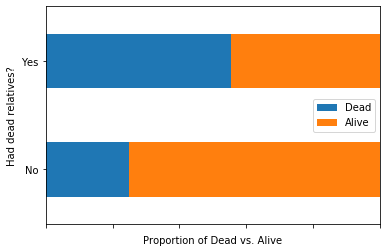

In [189]:
data=tabular_data.groupby(["has_dead_rels","is_alive"]).count()["name"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0, width = .5)
_ = p.set_xlim([0, 1]), p.set(yticklabels = ["No", "Yes"], xticklabels = "", xlabel = "Proportion of Dead vs. Alive", ylabel = "Had dead relatives?"), p.legend(["Dead", "Alive"])

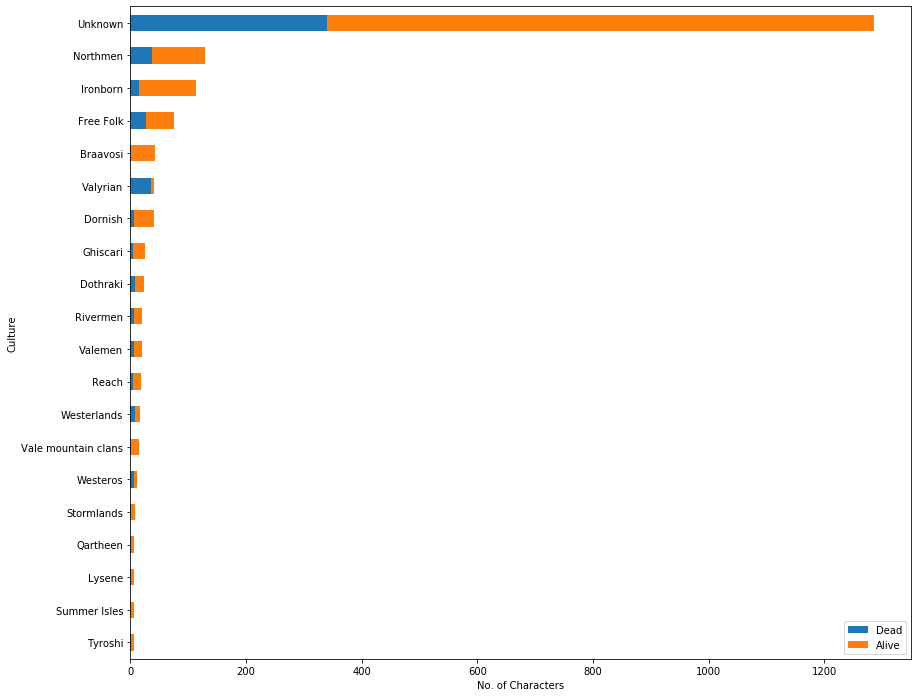

In [190]:
data=tabular_data.groupby(["culture","is_alive"]).count()["name"].unstack().copy(deep = True)
#data=data.loc[:, "total"]
data.loc[:, "total"]= data.sum(axis = 1)
list(data)
data=data[data['total']>5]
p = data[data.index != ""].sort_values("total")[[0, 1]].plot.barh(stacked = True, rot = 0, figsize = (14, 12),)
_ = p.set(xlabel = "No. of Characters", ylabel = "Culture"), p.legend(["Dead", "Alive"], loc = "lower right")

In [191]:
model_data=tabular_data[['is_alive','allegiances','nobility','culture','house','gender','has_Allegiance','has_dead_rels','mother','father','spouse','heir','data_poor']]
model_data=model_data.dropna()
# do we need to resample our data?
print("number living individuals:",len(model_data[model_data['is_alive']==1]))
print("number dead individuals:",len(model_data[model_data['is_alive']==0]))

number living individuals: 1427
number dead individuals: 532


As the data is not Balanced we will try to balance it
we can do that by up sampling dead individuals or by downsampling living individuals

In [192]:
#let's balance out our data
alive_model_data=model_data[model_data['is_alive']==1]
dead_model_data=model_data[model_data['is_alive']==0]
# we want equal numbers of living and dead individuals...
alive_downsampled=resample(alive_model_data,replace=False,n_samples=len(dead_model_data),random_state=42)
#merge the results back together
downsampled_model_data=dead_model_data.append(alive_downsampled)
print("number living individuals after resampling:",len(downsampled_model_data[downsampled_model_data['is_alive']==1]))
print("number dead individuals after resampling:",len(downsampled_model_data[downsampled_model_data['is_alive']==0]))

number living individuals after resampling: 532
number dead individuals after resampling: 532


In [193]:
X=downsampled_model_data[['allegiances','nobility','has_dead_rels','culture','house','gender','has_Allegiance','mother','father','spouse','heir','data_poor']]
X=pd.get_dummies(X)
y=downsampled_model_data['is_alive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [194]:
print(X)

      nobility  has_dead_rels  gender  has_Allegiance  data_poor  \
4            0              0       1             0.0          1   
6            1              0       1             0.0          0   
7            1              0       1             0.0          0   
8            1              0       1             0.0          0   
30           0              0       1             0.0          0   
...        ...            ...     ...             ...        ...   
417          0              0       1             1.0          0   
379          1              1       1             1.0          0   
1100         1              0       0             0.0          1   
911          1              0       1             0.0          1   
825          1              0       0             0.0          1   

      allegiances_House Arryn  allegiances_House Baratheon  \
4                           0                            0   
6                           0                            0 

In [195]:
classifier=RandomForestClassifier(n_estimators = 200, criterion='entropy', random_state=42,max_depth=200)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=200, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [196]:
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))

Accuracy:  0.684375
Precision:  0.6457142857142857
Recall:  0.743421052631579
AUC:  0.6871867167919801


In [197]:
feature_importance = pd.DataFrame(classifier.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importance.head(50)

,importance
gender,0.035951
has_dead_rels,0.033808
data_poor,0.031937
nobility,0.026193
house_House Targaryen,0.023129
house_Unknown,0.021960
culture_Unknown,0.021284
culture_Valyrian,0.020794
spouse_0,0.018952
allegiances_Unknown,0.016976


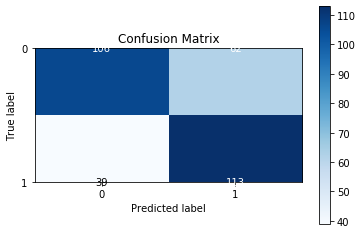

In [22]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred)

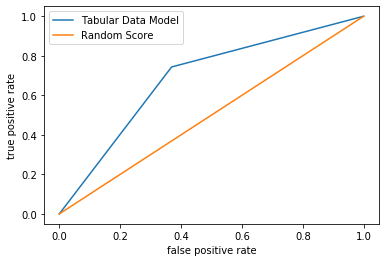

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.close()
plt.plot(fpr, tpr, label='Tabular Data Model')
plt.plot([0,1],[0,1], label='Random Score')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="bottom right")
plt.show()

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(random_state=42, max_depth=20)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [25]:
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))

Accuracy:  0.684375
Precision:  0.6424581005586593
Recall:  0.756578947368421
AUC:  0.68781328320802


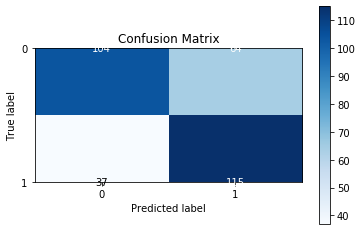

In [26]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

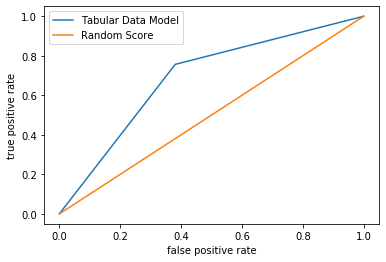

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.close()
plt.plot(fpr, tpr, label='Tabular Data Model')
plt.plot([0,1],[0,1], label='Random Score')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="bottom right")
plt.show()

In [28]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
classifier=tree.DecisionTreeClassifier(random_state=42, max_depth=2)
classifier.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

[Text(167.4, 181.2, 'X[230] <= 0.5\ngini = 0.5\nsamples = 744\nvalue = [364, 380]'),
 Text(83.7, 108.72, 'X[4] <= 0.5\ngini = 0.498\nsamples = 702\nvalue = [327, 375]'),
 Text(41.85, 36.23999999999998, 'gini = 0.48\nsamples = 318\nvalue = [191, 127]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.457\nsamples = 384\nvalue = [136, 248]'),
 Text(251.10000000000002, 108.72, 'X[11] <= 0.5\ngini = 0.21\nsamples = 42\nvalue = [37, 5]'),
 Text(209.25, 36.23999999999998, 'gini = 0.054\nsamples = 36\nvalue = [35, 1]'),
 Text(292.95, 36.23999999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]')]

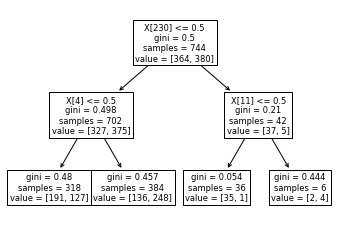

In [29]:
tree.plot_tree(classifier) 

#lightgbm

In [30]:
import lightgbm as ltb

In [31]:
classifier=ltb.LGBMClassifier(learning_rate=0.3, max_depth=-1,min_child_samples=20,n_estimators=200, n_jobs=-1, num_leaves=50, random_state=42,)
classifier.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=50, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [32]:
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))

Accuracy:  0.659375
Precision:  0.6102564102564103
Recall:  0.7828947368421053
AUC:  0.6652568922305765


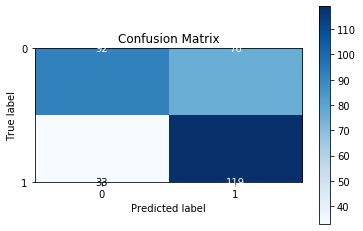

In [33]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

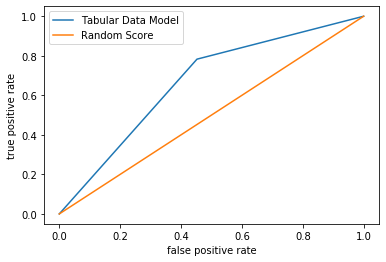

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.close()
plt.plot(fpr, tpr, label='Tabular Data Model')
plt.plot([0,1],[0,1], label='Random Score')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="bottom right")
plt.show()

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
classifier = GradientBoostingClassifier(random_state=42,learning_rate=0.1, n_estimators=100,)
classifier.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [37]:
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))

Accuracy:  0.684375
Precision:  0.6440677966101694
Recall:  0.75
AUC:  0.6875


ada boost

In [38]:
from sklearn.ensemble import AdaBoostClassifier
classifier= AdaBoostClassifier()
classifier.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [39]:
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))

Accuracy:  0.646875
Precision:  0.6089385474860335
Recall:  0.7171052631578947
AUC:  0.650219298245614


In [40]:
import xgboost as xgb

In [41]:
classifier=xgb.XGBClassifier(base_score=0.9, colsample_bylevel=1, n_estimators=12, learning_rate=0.5, max_depth=6, verbosity=1, num_parallel_tree=12 )
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.9, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=12, n_jobs=0, num_parallel_tree=12,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=1)

In [42]:
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))

Accuracy:  0.68125
Precision:  0.6358695652173914
Recall:  0.7697368421052632
AUC:  0.6854636591478697


In [43]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=500, random_state=0, verbose=1, bootstrap=False, min_samples_split=10, min_samples_leaf=1)
classifier.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.1s finished


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=500,
                     n_jobs=None, oob_score=False, random_state=0, verbose=1,
                     warm_start=False)

In [44]:
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))

Accuracy:  0.675
Precision:  0.6463414634146342
Recall:  0.6973684210526315
AUC:  0.676065162907268


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


In [45]:
from sklearn.linear_model import SGDClassifier

In [46]:
classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
classifier.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))

Accuracy:  0.55
Precision:  0.8333333333333334
Recall:  0.06578947368421052
AUC:  0.5269423558897244


In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
neigh = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))

Accuracy:  0.5625
Precision:  0.55
Recall:  0.4342105263157895
AUC:  0.556390977443609


In [51]:
from sklearn import svm

In [52]:
classifier = svm.SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [53]:
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))

Accuracy:  0.478125
Precision:  0.47634069400630913
Recall:  0.993421052631579
AUC:  0.5026629072681704


Gaussian Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [55]:
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))

Accuracy:  0.478125
Precision:  0.47634069400630913
Recall:  0.993421052631579
AUC:  0.5026629072681704


In [56]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0).fit(X, y)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))

Accuracy:  0.625
Precision:  0.5869565217391305
Recall:  0.7105263157894737
AUC:  0.6290726817042607


In [58]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [59]:
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))

Accuracy:  0.621875
Precision:  0.591715976331361
Recall:  0.6578947368421053
AUC:  0.6235902255639098


In [60]:
# connect to neo4j 
from py2neo import Graph
password='password'
user='neo4j'
uri = 'bolt://localhost:7687'
got_graph=Graph(uri, auth=(user,password))

In [61]:
query='''
    MATCH (n) RETURN distinct labels(n), count(*)
'''

got_graph.run(query).to_data_frame()

,labels(n),count(*)
0,[Battle],38
1,[House],350
2,"[Person, Knight]",280
3,"[Person, Dead, Knight]",104
4,"[Person, Dead]",383
5,[Person],1326
6,"[Person, Dead, King]",9
7,"[Person, King]",26
8,[Location],28
9,[Region],7


In [62]:
query='''
    call db.relationshipTypes
'''

got_graph.run(query).to_data_frame()

,relationshipType
0,ATTACKER
1,DEFENDER
2,IS_IN
3,ATTACKER_COMMANDER
4,DEFENDER_COMMANDER
5,DEFENDER_KING
6,ATTACKER_KING
7,RELATED_TO
8,BELONGS_TO
9,MEMBER_OF_CULTURE


In [63]:
names=tabular_data['name character_deaths'].to_list()
query='''
    UNWIND $names as names
    MATCH(p:Person)-[r]-(p2:Person)
    WHERE p.name=names.name_char_preds
    RETURN p.name as name, names.name_char_preds as name_char_preds, sum(r.weight) as num_interactions ,count(distinct p2) as num_people_interacted
'''
names = [{"name":row["name"], "name_char_preds": row["name character_predictions"]} for index, row in tabular_data.iterrows()]    
result1=got_graph.run(query,{"names":names}).to_data_frame()
print(len(result1))
result1.head()

873


,name,name_char_preds,num_interactions,num_people_interacted
0,Melisandre,Melisandre,327,23
1,Quaithe,Quaithe,11,1
2,Cleon,Cleon,21,3
3,Ghael,Ghael,13,2
4,Kraznys mo Nakloz,Kraznys mo Nakloz,19,2


In [64]:
names=tabular_data['name character_predictions'].to_list()
query='''
    UNWIND $names as names
    MATCH(p:Person)-[r]-(p2:Person)
    WHERE p.name=names.name_char_deaths
    RETURN p.name as name_char_deaths, names.name as name, sum(r.weight) as num_interactions ,count(distinct p2) as num_people_interacted
'''
names = [{"name":row["name"], "name_char_deaths": row["name character_deaths"]} for index, row in tabular_data.iterrows()]    
result2=got_graph.run(query,{"names":names}).to_data_frame()
print(len(result2))
result2.head()

572


,name_char_deaths,name,num_interactions,num_people_interacted
0,Melisandre,Melisandre,327,23
1,Quaithe,Quaithe,11,1
2,Ghael,Ghael,13,2
3,Kraznys mo Nakloz,Kraznys mo Nakloz,19,2
4,Brusco,Brusco,16,2


In [65]:
results=pd.merge(result1, result2, right_on='name', left_on='name', how='outer')
results['num_interactions']=results['num_interactions_x']
results[results['name_char_preds'].isna()]['num_interactions']=results['num_interactions_y']
results['num_people_interacted']=results['num_people_interacted_x']
results[results['name_char_preds'].isna()]['num_people_interacted']=results['num_people_interacted_y']
results=results[['name','num_interactions','num_people_interacted']]
# and now lets add our results into our dataframe for predictions
graphy_data=tabular_data.merge(results,on='name',how='left')

In [66]:
graphy_data.head()

,name,name character_deaths,name character_predictions,allegiances,nobility,gender,has_Allegiance,is_alive,has_dead_rels,culture,...,house,heir,data_poor,known_culture,known_spouse,known_heir,known_mother,known_father,num_interactions,num_people_interacted
0,Erreg,NaN,Erreg,Unknown,0,1,0.0,1,0,Andals,...,Unknown,Unknown,1,1,1,0,0,0,NaN,NaN
1,Hugor of the Hill,NaN,Hugor of the Hill,Unknown,0,1,0.0,1,0,Andals,...,Unknown,Unknown,1,1,1,0,0,0,NaN,NaN
2,Melisandre,Melisandre,Melisandre,House Baratheon,0,0,1.0,1,0,Asshai,...,R'hllor,Unknown,0,1,1,0,0,0,327.0,23.0
3,Quaithe,Quaithe,Quaithe,None,1,0,0.0,1,0,Asshai,...,Unknown,Unknown,0,1,1,0,0,0,11.0,1.0
4,Cleon,NaN,Cleon,Unknown,0,1,0.0,0,0,Astapori,...,Unknown,Unknown,1,1,1,0,0,0,21.0,3.0


In [67]:
query='''
    UNWIND $names as names
    MATCH(p:Person)-[r]-(p2:Dead)
    WHERE p.name=names.name_char_preds
    RETURN p.name as name, names.name_char_preds as name_char_preds, sum(r.weight) as num_interactions_dead ,count(distinct p2) as num_people_interacted_dead
'''
names = [{"name":row["name"], "name_char_preds": row["name character_predictions"]} for index, row in tabular_data.iterrows()]    
result1=got_graph.run(query,{"names":names}).to_data_frame()


query='''
    UNWIND $names as names
    MATCH(p:Person)-[r]-(p2:Dead)
    WHERE p.name=names.name_char_deaths
    RETURN p.name as name_char_deaths, names.name as name, sum(r.weight) as num_interactions_dead ,count(distinct p2) as num_people_interacted_dead
'''
names = [{"name":row["name"], "name_char_deaths": row["name character_deaths"]} for index, row in tabular_data.iterrows()]    
result2=got_graph.run(query,{"names":names}).to_data_frame()

results=pd.merge(result1, result2, right_on='name', left_on='name', how='outer')
results['num_interactions_dead']=results['num_interactions_dead_x']
results[results['name_char_preds'].isna()]['num_interactions_dead']=results['num_interactions_dead_y']
results['num_people_interacted_dead']=results['num_people_interacted_dead_x']
results[results['name_char_preds'].isna()]['num_people_interacted_dead']=results['num_people_interacted_dead_y']
results=results[['name','num_interactions_dead','num_people_interacted_dead']]
graphy_data=graphy_data.merge(results,on='name',how='left')

In [68]:

graphy_data.head()

,name,name character_deaths,name character_predictions,allegiances,nobility,gender,has_Allegiance,is_alive,has_dead_rels,culture,...,data_poor,known_culture,known_spouse,known_heir,known_mother,known_father,num_interactions,num_people_interacted,num_interactions_dead,num_people_interacted_dead
0,Erreg,NaN,Erreg,Unknown,0,1,0.0,1,0,Andals,...,1,1,1,0,0,0,NaN,NaN,NaN,NaN
1,Hugor of the Hill,NaN,Hugor of the Hill,Unknown,0,1,0.0,1,0,Andals,...,1,1,1,0,0,0,NaN,NaN,NaN,NaN
2,Melisandre,Melisandre,Melisandre,House Baratheon,0,0,1.0,1,0,Asshai,...,0,1,1,0,0,0,327.0,23.0,25.0,6.0
3,Quaithe,Quaithe,Quaithe,None,1,0,0.0,1,0,Asshai,...,0,1,1,0,0,0,11.0,1.0,NaN,NaN
4,Cleon,NaN,Cleon,Unknown,0,1,0.0,0,0,Astapori,...,1,1,1,0,0,0,21.0,3.0,3.0,1.0


In [69]:
# Djikstra's shortest path between each person and Daenery - warning, this is *slow* 
query='''
    UNWIND $names as names
    MATCH (start:Person{name:'Daenerys Targaryen'}),(end:Person{name:names.name_char_preds}) 
    CALL algo.shortestPath.stream(start,end,'cost',{
        nodeQuery: 'MATCH (p:Person) RETURN id(p) as id',
        relationshipQuery:'MATCH (p:Person)-[]-(p2:Person) RETURN id(p) as source, id(p2) as target',
        graph:'cypher', write:false, weightProperty:null})
    YIELD nodeId, cost
    RETURN end.name as name, names.name_char_preds, max(cost) as num_hops_daenerys
'''
names = [{"name":row["name"], "name_char_preds": row["name character_predictions"]} for index, row in tabular_data.iterrows()]    
result1=got_graph.run(query,{"names":names}).to_data_frame()

In [70]:
result1.head(3)

,name,names.name_char_preds,num_hops_daenerys
0,Melisandre,Melisandre,3.0
1,Quaithe,Quaithe,1.0
2,Cleon,Cleon,1.0


In [71]:
query='''
    UNWIND $names as names
    MATCH (start:Person{name:'Daenerys Targaryen'}),(end:Person{name:names.name_char_deaths}) 
    CALL algo.shortestPath.stream(start,end,'cost',{
        nodeQuery: 'MATCH (p:Person) RETURN id(p) as id',
        relationshipQuery:'MATCH (p:Person)-[]-(p2:Person) RETURN id(p) as source, id(p2) as target',
        graph:'cypher', write:false, weightProperty:null})
    YIELD nodeId, cost
    RETURN end.name as name, names.name_char_deaths, max(cost) as num_hops_daenerys
'''
names = [{"name":row["name"], "name_char_deaths": row["name character_deaths"]} for index, row in tabular_data.iterrows()]    
result2=got_graph.run(query,{"names":names}).to_data_frame()

In [72]:
result2.head(20)

,name,names.name_char_deaths,num_hops_daenerys
0,Melisandre,Melisandre,3.0
1,Quaithe,Quaithe,1.0
2,Ghael,Ghael,1.0
3,Kraznys mo Nakloz,Kraznys mo Nakloz,1.0
4,Brusco,Brusco,3.0
5,Lanna (Happy Port),Lanna (Happy Port),4.0
6,Mero,Mero,1.0
7,Syrio Forel,Syrio Forel,2.0
8,Ternesio Terys,Ternesio Terys,3.0
9,Tycho Nestoris,Tycho Nestoris,3.0


In [73]:
results=pd.merge(result1, result2, right_on='name', left_on='name', how='outer')
results['num_hops_daenerys']=results['num_hops_daenerys_x']
results[results['names.name_char_preds'].isna()]['num_hops_daenerys']=results['num_hops_daenerys_y']
results=results[['name','num_hops_daenerys']]
results.head(20)
#graphy_data=graphy_data.merge(results,on='name',how='left')

,name,num_hops_daenerys
0,Melisandre,3.0
1,Quaithe,1.0
2,Cleon,1.0
3,Ghael,1.0
4,Kraznys mo Nakloz,1.0
5,Bellegere Otherys,3.0
6,Brea,3.0
7,Brusco,3.0
8,Denyo Terys,3.0
9,Lanna (Happy Port),4.0


In [74]:
#merge back into our data set
graphy_data=graphy_data.merge(results,on='name',how='left')

In [75]:
graphy_data.head(20)

,name,name character_deaths,name character_predictions,allegiances,nobility,gender,has_Allegiance,is_alive,has_dead_rels,culture,...,known_culture,known_spouse,known_heir,known_mother,known_father,num_interactions,num_people_interacted,num_interactions_dead,num_people_interacted_dead,num_hops_daenerys
0,Erreg,NaN,Erreg,Unknown,0,1,0.0,1,0,Andals,...,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN
1,Hugor of the Hill,NaN,Hugor of the Hill,Unknown,0,1,0.0,1,0,Andals,...,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN
2,Melisandre,Melisandre,Melisandre,House Baratheon,0,0,1.0,1,0,Asshai,...,1,1,0,0,0,327.0,23.0,25.0,6.0,3.0
3,Quaithe,Quaithe,Quaithe,None,1,0,0.0,1,0,Asshai,...,1,1,0,0,0,11.0,1.0,NaN,NaN,1.0
4,Cleon,NaN,Cleon,Unknown,0,1,0.0,0,0,Astapori,...,1,1,0,0,0,21.0,3.0,3.0,1.0,1.0
5,Ghael,Ghael,Ghael,None,0,1,0.0,1,0,Astapori,...,1,1,0,0,0,13.0,2.0,5.0,1.0,1.0
6,Grazdan,Grazdan,Grazdan,None,1,1,0.0,0,0,Astapori,...,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN
7,Grazdan mo Ullhor,Grazdan mo Ullhor,Grazdan mo Ullhor,None,1,1,0.0,0,0,Astapori,...,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN
8,Kraznys mo Nakloz,Kraznys mo Nakloz,Kraznys mo Nakloz,None,1,1,0.0,0,0,Astapori,...,1,1,0,0,0,19.0,2.0,NaN,NaN,1.0
9,Alia,Alia of Braavos,Alia,None,0,0,0.0,1,0,Braavosi,...,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN


In [76]:
# Djikstra's shortest path between each person and Daenery - warning, this is *slow* 
query='''
    UNWIND $names as names
    MATCH (start:Person{name:'Cersei Lannister'}),(end:Person{name:names.name_char_preds}) 
    CALL algo.shortestPath.stream(start,end,'cost',{
        nodeQuery: 'MATCH (p:Person) RETURN id(p) as id',
        relationshipQuery:'MATCH (p:Person)-[]-(p2:Person) RETURN id(p) as source, id(p2) as target',
        graph:'cypher', write:false, weightProperty:null})
    YIELD nodeId, cost
    RETURN end.name as name, names.name_char_preds as name_char_preds, max(cost) as num_hops_cersei
'''
names = [{"name":row["name"], "name_char_preds": row["name character_predictions"]} for index, row in tabular_data.iterrows()]    
result1=got_graph.run(query,{"names":names}).to_data_frame()
query='''
    UNWIND $names as names
    MATCH (start:Person{name:'Cersei Lannister'}),(end:Person{name:names.name_char_deaths}) 
    CALL algo.shortestPath.stream(start,end,'cost',{
        nodeQuery: 'MATCH (p:Person) RETURN id(p) as id',
        relationshipQuery:'MATCH (p:Person)-[]-(p2:Person) RETURN id(p) as source, id(p2) as target',
        graph:'cypher', write:false, weightProperty:null})
    YIELD nodeId, cost
    RETURN end.name as name, names.name_char_deaths as name_char_deaths, max(cost) as num_hops_cersei
'''
names = [{"name":row["name"], "name_char_deaths": row["name character_deaths"]} for index, row in tabular_data.iterrows()]    
result2=got_graph.run(query,{"names":names}).to_data_frame()
results=pd.merge(result1, result2, right_on='name', left_on='name', how='outer')

results['num_hops_cersei']=results['num_hops_cersei_x']
results[results['name_char_preds'].isna()]['num_hops_cersei']=results['num_hops_cersei_y']
results=results[['name','num_hops_cersei']]
graphy_data=graphy_data.merge(results,on='name',how='left')

In [77]:
# Djikstra's shortest path between each person and Daenery - warning, this is *slow* 
query='''
    UNWIND $names as names
    MATCH (start:Person{name:'Jon Snow'}),(end:Person{name:names.name_char_preds}) 
    CALL algo.shortestPath.stream(start,end,'cost',{
        nodeQuery: 'MATCH (p:Person) RETURN id(p) as id',
        relationshipQuery:'MATCH (p:Person)-[]-(p2:Person) RETURN id(p) as source, id(p2) as target',
        graph:'cypher', write:false, weightProperty:null})
    YIELD nodeId, cost
    RETURN end.name as name, names.name_char_preds as name_char_preds, max(cost) as num_hops_jonsnow
'''
names = [{"name":row["name"], "name_char_preds": row["name character_predictions"]} for index, row in tabular_data.iterrows()]    
result1=got_graph.run(query,{"names":names}).to_data_frame()
query='''
    UNWIND $names as names
    MATCH (start:Person{name:'Jon Snow'}),(end:Person{name:names.name_char_deaths}) 
    CALL algo.shortestPath.stream(start,end,'cost',{
        nodeQuery: 'MATCH (p:Person) RETURN id(p) as id',
        relationshipQuery:'MATCH (p:Person)-[]-(p2:Person) RETURN id(p) as source, id(p2) as target',
        graph:'cypher', write:false, weightProperty:null})
    YIELD nodeId, cost
    RETURN end.name as name, names.name_char_deaths as name_char_deaths, max(cost) as num_hops_jonsnow
'''
names = [{"name":row["name"], "name_char_deaths": row["name character_deaths"]} for index, row in tabular_data.iterrows()]    
result2=got_graph.run(query,{"names":names}).to_data_frame()
results=pd.merge(result1, result2, right_on='name', left_on='name', how='outer')

results['num_hops_jonsnow']=results['num_hops_jonsnow_x']
results[results['name_char_preds'].isna()]['num_hops_jonsnow']=results['num_hops_jonsnow_y']
results=results[['name','num_hops_jonsnow']]
graphy_data=graphy_data.merge(results,on='name',how='left')

In [78]:
# now, before I forget, I'm going to fill the nas with 10 for these - we'll just assume anyone with an unknown number of hops is far away
graphy_data['num_hops_daenerys']=graphy_data['num_hops_daenerys'].fillna(value=10)
graphy_data['num_hops_cersei']=graphy_data['num_hops_cersei'].fillna(value=10)
graphy_data['num_hops_jonsnow']=graphy_data['num_hops_jonsnow'].fillna(value=10)

# Centrality: PageRank
PageRank is an algorithm that measures the transitive influence or connectivity of nodes. It counts the number, and quality, of links to a node which determines an estimation of how important the node is. The underlying assumption is that nodes of importance are more likely to receive a higher volume of links from other nodes.

In [79]:
query='''
    CALL algo.pageRank.stream(
        'MATCH (p:Person) RETURN id(p) as id',
        'MATCH (p:Person)-[r]-(p2:Person) RETURN id(p) as source, id(p2) as target, sum(r.weight) as weight',
        {graph:'cypher', weightProperty:'weight',write:false})
    YIELD nodeId, score
    RETURN algo.asNode(nodeId).name AS name, score as pageRank
    ORDER BY pageRank DESC
'''
results=got_graph.run(query).to_data_frame()
results.head(20)

,name,pageRank
0,Jon Snow,27.308127
1,Tyrion Lannister,25.038014
2,Cersei Lannister,17.942172
3,Daenerys Targaryen,16.918413
4,Jaime Lannister,15.124083
5,Eddard Stark,14.428378
6,Arya Stark,14.200394
7,Stannis Baratheon,13.813660
8,Robb Stark,13.246772
9,Joffrey Baratheon,13.192103


In [80]:
graphy_data=graphy_data.merge(results,on='name',how='left')

In [81]:
graphy_data.head(20)

,name,name character_deaths,name character_predictions,allegiances,nobility,gender,has_Allegiance,is_alive,has_dead_rels,culture,...,known_mother,known_father,num_interactions,num_people_interacted,num_interactions_dead,num_people_interacted_dead,num_hops_daenerys,num_hops_cersei,num_hops_jonsnow,pageRank
0,Erreg,NaN,Erreg,Unknown,0,1,0.0,1,0,Andals,...,0,0,NaN,NaN,NaN,NaN,10.0,10.0,10.0,0.150000
1,Hugor of the Hill,NaN,Hugor of the Hill,Unknown,0,1,0.0,1,0,Andals,...,0,0,NaN,NaN,NaN,NaN,10.0,10.0,10.0,0.150000
2,Melisandre,Melisandre,Melisandre,House Baratheon,0,0,1.0,1,0,Asshai,...,0,0,327.0,23.0,25.0,6.0,3.0,2.0,1.0,3.309224
3,Quaithe,Quaithe,Quaithe,None,1,0,0.0,1,0,Asshai,...,0,0,11.0,1.0,NaN,NaN,1.0,2.0,3.0,0.248007
4,Cleon,NaN,Cleon,Unknown,0,1,0.0,0,0,Astapori,...,0,0,21.0,3.0,3.0,1.0,1.0,2.0,3.0,0.398803
5,Ghael,Ghael,Ghael,None,0,1,0.0,1,0,Astapori,...,0,0,13.0,2.0,5.0,1.0,1.0,2.0,3.0,0.301680
6,Grazdan,Grazdan,Grazdan,None,1,1,0.0,0,0,Astapori,...,0,0,NaN,NaN,NaN,NaN,10.0,10.0,10.0,0.150000
7,Grazdan mo Ullhor,Grazdan mo Ullhor,Grazdan mo Ullhor,None,1,1,0.0,0,0,Astapori,...,0,0,NaN,NaN,NaN,NaN,10.0,10.0,10.0,0.150000
8,Kraznys mo Nakloz,Kraznys mo Nakloz,Kraznys mo Nakloz,None,1,1,0.0,0,0,Astapori,...,0,0,19.0,2.0,NaN,NaN,1.0,2.0,3.0,0.317330
9,Alia,Alia of Braavos,Alia,None,0,0,0.0,1,0,Braavosi,...,0,0,NaN,NaN,NaN,NaN,10.0,10.0,10.0,0.150000


# Community Detection: Louvain
The Louvain method of community detection is an algorithm for detecting communities in networks. It maximizes a modularity score for each community, where the modularity quantifies the quality of an assignment of nodes to communities by evaluating how much more densely connected the nodes within a community are, compared to how connected they would be in a random network.

In [89]:
query='''
    CALL algo.louvain.stream(null,null,{weightProperty:'weight',includeIntermediateCommunities: false, iterations:10, dampingFactor:0.85, direction:"both"})
    YIELD nodeId, community
    RETURN algo.asNode(nodeId).name AS name, community
    ORDER BY community;
'''
results=got_graph.run(query).to_data_frame()

In [90]:
results.head(50)

,name,community
0,Lannister,38
1,Rolder,38
2,Cadwyn,38
3,Dunaver,38
4,Godwyn,38
5,Hoke,38
6,Jodge,38
7,Lester,38
8,Lum,38
9,Lyonel (knight),38


In [91]:
graphy_data=graphy_data.merge(results,on='name',how='left')

In [92]:
graphy_data.head(50)

,name,name character_deaths,name character_predictions,allegiances,nobility,gender,has_Allegiance,is_alive,has_dead_rels,culture,...,known_father,num_interactions,num_people_interacted,num_interactions_dead,num_people_interacted_dead,num_hops_daenerys,num_hops_cersei,num_hops_jonsnow,pageRank,community
0,Erreg,NaN,Erreg,Unknown,0,1,0.0,1,0,Andals,...,0,NaN,NaN,NaN,NaN,10.0,10.0,10.0,0.150000,2484.0
1,Hugor of the Hill,NaN,Hugor of the Hill,Unknown,0,1,0.0,1,0,Andals,...,0,NaN,NaN,NaN,NaN,10.0,10.0,10.0,0.150000,2484.0
2,Melisandre,Melisandre,Melisandre,House Baratheon,0,0,1.0,1,0,Asshai,...,0,327.0,23.0,25.0,6.0,3.0,2.0,1.0,3.309224,77.0
3,Quaithe,Quaithe,Quaithe,None,1,0,0.0,1,0,Asshai,...,0,11.0,1.0,NaN,NaN,1.0,2.0,3.0,0.248007,1832.0
4,Cleon,NaN,Cleon,Unknown,0,1,0.0,0,0,Astapori,...,0,21.0,3.0,3.0,1.0,1.0,2.0,3.0,0.398803,1653.0
5,Ghael,Ghael,Ghael,None,0,1,0.0,1,0,Astapori,...,0,13.0,2.0,5.0,1.0,1.0,2.0,3.0,0.301680,1653.0
6,Grazdan,Grazdan,Grazdan,None,1,1,0.0,0,0,Astapori,...,0,NaN,NaN,NaN,NaN,10.0,10.0,10.0,0.150000,1653.0
7,Grazdan mo Ullhor,Grazdan mo Ullhor,Grazdan mo Ullhor,None,1,1,0.0,0,0,Astapori,...,0,NaN,NaN,NaN,NaN,10.0,10.0,10.0,0.150000,2351.0
8,Kraznys mo Nakloz,Kraznys mo Nakloz,Kraznys mo Nakloz,None,1,1,0.0,0,0,Astapori,...,0,19.0,2.0,NaN,NaN,1.0,2.0,3.0,0.317330,1832.0
9,Alia,Alia of Braavos,Alia,None,0,0,0.0,1,0,Braavosi,...,0,NaN,NaN,NaN,NaN,10.0,10.0,10.0,0.150000,486.0


In [93]:
graphy_data.to_csv ('neo4j_features.csv', index = None, header=True)

In [200]:
# quick performance check
model_data=graphy_data[['num_hops_daenerys','num_hops_cersei','num_hops_jonsnow','pageRank','community','num_interactions_dead','num_people_interacted_dead','num_interactions','num_people_interacted','is_alive','allegiances','nobility','gender','has_Allegiance','has_dead_rels','culture','mother','father','spouse','house','heir','data_poor']]
model_data=model_data.fillna(value=0)
#let's balance out our data
alive_model_data=model_data[model_data['is_alive']==1]
dead_model_data=model_data[model_data['is_alive']==0]
# we want equal numbers of living and dead individuals...
alive_downsampled=resample(alive_model_data,replace=False,n_samples=len(dead_model_data),random_state=42)
#merge the results back together
downsampled_model_data=dead_model_data.append(alive_downsampled)
print("number living individuals after resampling:",len(downsampled_model_data[downsampled_model_data['is_alive']==1]))
print("number dead individuals after resampling:",len(downsampled_model_data[downsampled_model_data['is_alive']==0]))
X=downsampled_model_data[['num_hops_daenerys','num_hops_cersei','num_hops_jonsnow','pageRank','community','num_interactions_dead','num_people_interacted_dead','num_interactions','num_people_interacted','allegiances','nobility','gender','has_Allegiance','has_dead_rels','culture','mother','father','spouse','house','heir','data_poor']]
X=pd.get_dummies(X)
y=downsampled_model_data['is_alive']

number living individuals after resampling: 535
number dead individuals after resampling: 535


In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [202]:
graph_classifier=RandomForestClassifier(n_estimators = 5000, criterion='entropy', random_state=42,max_depth=22)
graph_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=22, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [166]:
y_pred=graph_classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))

Accuracy:  0.7133956386292835
Precision:  0.6505376344086021
Recall:  0.8175675675675675
AUC:  0.7209225121074831


In [161]:
# let's see if we can do any better with some parameter tuning
param_grid = { 
    'n_estimators': [5000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [22],
    'criterion' :['gini', 'entropy']
}
classifier_grid=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=classifier_grid, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_
optimised_random_forest_graph = CV_rfc.best_estimator_

In [162]:
optimised_random_forest_graph.fit(X_train,y_train)
y_pred=optimised_random_forest_graph.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))

Accuracy:  0.6884735202492211
Precision:  0.6263157894736842
Recall:  0.8040540540540541
AUC:  0.6968247148882987


In [175]:
feature_importance = pd.DataFrame(graph_classifier.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importance.head(50)

,importance
community,0.079034
pageRank,0.055636
num_interactions,0.046398
num_interactions_dead,0.043232
num_people_interacted_dead,0.042328
num_people_interacted,0.040427
house_House Targaryen,0.030473
num_hops_daenerys,0.022764
num_hops_cersei,0.021718
has_dead_rels,0.020122


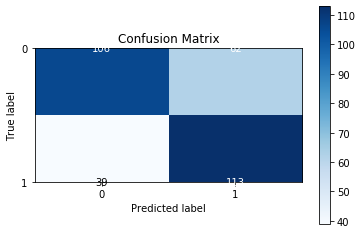

In [198]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [199]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(random_state=42, max_depth=20)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))


Accuracy:  0.684375
Precision:  0.6424581005586593
Recall:  0.756578947368421
AUC:  0.68781328320802


In [220]:
import lightgbm as ltb
classifier=ltb.LGBMClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))


Accuracy:  0.6697819314641744
Precision:  0.6141304347826086
Recall:  0.7635135135135135
AUC:  0.6765544446180285


In [219]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(random_state=42,learning_rate=0.1, n_estimators=100,)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))


Accuracy:  0.6728971962616822
Precision:  0.6059113300492611
Recall:  0.831081081081081
AUC:  0.6843266677081705


In [217]:
from sklearn.ensemble import AdaBoostClassifier
classifier= AdaBoostClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))


Accuracy:  0.6822429906542056
Precision:  0.6292134831460674
Recall:  0.7567567567567568
AUC:  0.6876269332916732


In [221]:
classifier=xgb.XGBClassifier(base_score=0.9, colsample_bylevel=1, n_estimators=12, learning_rate=0.5, max_depth=6, verbosity=1, num_parallel_tree=12 )
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))


Accuracy:  0.6822429906542056
Precision:  0.6263736263736264
Recall:  0.7702702702702703
AUC:  0.6886033432276206


In [222]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=500, random_state=0, verbose=1, bootstrap=False, min_samples_split=10, min_samples_leaf=1)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy:  0.6853582554517134
Precision:  0.6358381502890174
Recall:  0.7432432432432432
AUC:  0.6895406967661303


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


In [223]:
classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))


Accuracy:  0.4984423676012461
Precision:  0.24
Recall:  0.04054054054054054
AUC:  0.4653569754725824


In [224]:
neigh = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))


Accuracy:  0.46105919003115264
Precision:  0.46105919003115264
Recall:  1.0
AUC:  0.5


In [225]:
classifier = svm.SVC()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))


Accuracy:  0.6510903426791277
Precision:  0.5865384615384616
Recall:  0.8243243243243243
AUC:  0.6636072488673646


In [226]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))


Accuracy:  0.6510903426791277
Precision:  0.5865384615384616
Recall:  0.8243243243243243
AUC:  0.6636072488673646


In [227]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0).fit(X, y)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))


Accuracy:  0.6573208722741433
Precision:  0.5959595959595959
Recall:  0.7972972972972973
AUC:  0.6674347758162787


In [228]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("AUC: ",roc_auc_score(y_test,y_pred))


Accuracy:  0.5950155763239875
Precision:  0.5365853658536586
Recall:  0.8918918918918919
AUC:  0.6164661771598188
